In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [3]:
#importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/df_combined.csv')

In [4]:
dataset.dtypes

Unnamed: 0                  int64
ZIPCODE                     int64
CTW_<25_Min               float64
CTW_25-45_Min             float64
CTW_>45_Min               float64
pop15_marital_status      float64
pop25_att_Bachelors       float64
2021_Median_Home_Value    float64
2021_Income               float64
final_score_scale         float64
0_percent                 float64
1_percent                 float64
2_percent                 float64
dtype: object

In [5]:
dataset.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

In [6]:
#removing the unnamed dataset
dataset.drop('a', axis = 1, inplace = True)

In [7]:
dataset.dtypes

ZIPCODE                     int64
CTW_<25_Min               float64
CTW_25-45_Min             float64
CTW_>45_Min               float64
pop15_marital_status      float64
pop25_att_Bachelors       float64
2021_Median_Home_Value    float64
2021_Income               float64
final_score_scale         float64
0_percent                 float64
1_percent                 float64
2_percent                 float64
dtype: object

In [8]:
dataset.head()

,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
0,10001,0.51,0.36,0.13,0.32,0.42,0.472468,0.521412,0.627726,0.381152,0.609691,0.009157
1,10002,0.35,0.41,0.26,0.39,0.24,0.416539,0.189844,0.561431,0.998278,0.001722,0.000000
2,10003,0.52,0.38,0.13,0.28,0.44,0.676661,0.605687,0.624064,0.868908,0.131092,0.000000
3,10004,0.48,0.43,0.09,0.40,0.48,0.681547,0.880601,0.661027,0.716858,0.001637,0.281506
4,10005,0.53,0.39,0.08,0.33,0.52,0.804327,0.847911,0.693762,0.769063,0.230937,0.000000


In [9]:
dataset

,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
0,10001,0.51,0.36,0.13,0.32,0.42,0.472468,0.521412,0.627726,0.381152,0.609691,0.009157
1,10002,0.35,0.41,0.26,0.39,0.24,0.416539,0.189844,0.561431,0.998278,0.001722,0.000000
2,10003,0.52,0.38,0.13,0.28,0.44,0.676661,0.605687,0.624064,0.868908,0.131092,0.000000
3,10004,0.48,0.43,0.09,0.40,0.48,0.681547,0.880601,0.661027,0.716858,0.001637,0.281506
4,10005,0.53,0.39,0.08,0.33,0.52,0.804327,0.847911,0.693762,0.769063,0.230937,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
175,11691,0.29,0.21,0.50,0.40,0.17,0.303052,0.250994,0.822393,0.026514,0.001116,0.972370
176,11692,0.16,0.20,0.64,0.38,0.17,0.255352,0.242189,0.529640,0.956311,0.038835,0.004854
177,11693,0.16,0.24,0.60,0.40,0.17,0.235193,0.340733,0.682084,0.621622,0.297297,0.081081
178,11694,0.24,0.31,0.45,0.48,0.25,0.393605,0.459603,0.630662,0.596296,0.025926,0.377778


In [10]:
#extra variables
extra_data_var = pd.read_csv('extra.csv')

In [11]:
extra_data_var

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Unemployment Rate,2019_Pop_3+_in_Nursery/Presch
0,11697,0.0000,18,0.080,0.0316
1,11694,0.0000,37,0.091,0.0230
2,11693,0.0000,87,0.099,0.0222
3,11692,0.0014,80,0.184,0.0295
4,11691,0.0003,81,0.131,0.0278
...,...,...,...,...,...
192,10002,0.0000,96,0.116,0.0104
193,10001,0.0000,221,0.083,0.0074
194,7086,0.0000,58,0.000,0.0000
195,7020,0.0000,43,0.000,0.0000


In [12]:
dataset.rename({"ZIPCODE":"zipcode"}, axis="columns", inplace=True)

In [14]:
merged_var_dataset = pd.merge(extra_data_var, dataset, on='zipcode')

In [15]:
merged_var_dataset

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Unemployment Rate,2019_Pop_3+_in_Nursery/Presch,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
0,11697,0.0000,18,0.080,0.0316,0.26,0.25,0.51,0.64,0.29,0.322790,0.563877,0.865109,0.000000,0.022222,0.977778
1,11694,0.0000,37,0.091,0.0230,0.24,0.31,0.45,0.48,0.25,0.393605,0.459603,0.630662,0.596296,0.025926,0.377778
2,11693,0.0000,87,0.099,0.0222,0.16,0.24,0.60,0.40,0.17,0.235193,0.340733,0.682084,0.621622,0.297297,0.081081
3,11692,0.0014,80,0.184,0.0295,0.16,0.20,0.64,0.38,0.17,0.255352,0.242189,0.529640,0.956311,0.038835,0.004854
4,11691,0.0003,81,0.131,0.0278,0.29,0.21,0.50,0.40,0.17,0.303052,0.250994,0.822393,0.026514,0.001116,0.972370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,10005,0.0031,244,0.038,0.0118,0.53,0.39,0.08,0.33,0.52,0.804327,0.847911,0.693762,0.769063,0.230937,0.000000
176,10004,0.0014,294,0.040,0.0182,0.48,0.43,0.09,0.40,0.48,0.681547,0.880601,0.661027,0.716858,0.001637,0.281506
177,10003,0.0005,120,0.071,0.0079,0.52,0.38,0.13,0.28,0.44,0.676661,0.605687,0.624064,0.868908,0.131092,0.000000
178,10002,0.0000,96,0.116,0.0104,0.35,0.41,0.26,0.39,0.24,0.416539,0.189844,0.561431,0.998278,0.001722,0.000000


In [18]:
#CTW_<25_Min - higher the better
#CTW_25-45_Min - moderate
#CTW_>45_Min - lower the better

# Merge and get the score -- Lower the travel time higher the overall score
merged_var_dataset.sort_values(by = ['CTW_<25_Min', 'CTW_25-45_Min', 'CTW_>45_Min'], ascending = [False, False, True],  axis=0)


,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Unemployment Rate,2019_Pop_3+_in_Nursery/Presch,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
135,10281,0.0000,123,0.061,0.0000,0.67,0.30,0.04,0.50,0.40,0.000000,1.000000,0.658742,1.000000,0.000000,0.000000
166,10016,0.0000,115,0.062,0.0085,0.57,0.31,0.11,0.32,0.44,0.580674,0.620702,0.534923,0.715596,0.281346,0.003058
170,10011,0.0013,153,0.068,0.0101,0.56,0.35,0.10,0.32,0.41,0.739896,0.693562,0.654958,0.692655,0.249487,0.057858
169,10012,0.0000,180,0.055,0.0071,0.56,0.33,0.10,0.34,0.44,1.000000,0.574082,0.672568,0.994901,0.005099,0.000000
165,10017,0.0000,166,0.023,0.0050,0.56,0.29,0.16,0.35,0.49,0.463230,0.642917,0.784528,0.493266,0.506734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,11203,0.0008,93,0.105,0.0118,0.14,0.33,0.52,0.39,0.17,0.273839,0.289534,0.590739,0.535826,0.383178,0.080997
84,11207,0.0004,116,0.152,0.0164,0.14,0.28,0.58,0.31,0.13,0.297214,0.212454,0.579007,0.872671,0.127329,0.000000
141,10044,0.0000,270,0.087,0.0174,0.13,0.61,0.26,0.48,0.25,0.527655,0.534347,0.738966,0.000000,1.000000,0.000000
83,11208,0.0003,107,0.118,0.0212,0.13,0.43,0.43,0.39,0.11,0.292390,0.236799,0.796057,0.196552,0.748276,0.055172


In [21]:
merged_var_dataset['commute_rank'] = merged_var_dataset['CTW_<25_Min'].rank(method = 'first', pct=True)
merged_var_dataset.sort_values(by = ['CTW_<25_Min'], ascending = [False],  axis=0)

NameError: ignored

In [22]:
merged_var_dataset.sort_values(by = ['CTW_<25_Min'], ascending = [False],  axis=0)

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Unemployment Rate,2019_Pop_3+_in_Nursery/Presch,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent,commute_rank
135,10281,0.0000,123,0.061,0.0000,0.67,0.30,0.04,0.50,0.40,0.000000,1.000000,0.658742,1.000000,0.000000,0.000000,1.000000
166,10016,0.0000,115,0.062,0.0085,0.57,0.31,0.11,0.32,0.44,0.580674,0.620702,0.534923,0.715596,0.281346,0.003058,0.994444
165,10017,0.0000,166,0.023,0.0050,0.56,0.29,0.16,0.35,0.49,0.463230,0.642917,0.784528,0.493266,0.506734,0.000000,0.977778
170,10011,0.0013,153,0.068,0.0101,0.56,0.35,0.10,0.32,0.41,0.739896,0.693562,0.654958,0.692655,0.249487,0.057858,0.988889
169,10012,0.0000,180,0.055,0.0071,0.56,0.33,0.10,0.34,0.44,1.000000,0.574082,0.672568,0.994901,0.005099,0.000000,0.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,11104,0.0021,58,0.076,0.0097,0.14,0.50,0.37,0.45,0.31,0.372064,0.346428,0.660129,0.741379,0.258621,0.000000,0.038889
84,11207,0.0004,116,0.152,0.0164,0.14,0.28,0.58,0.31,0.13,0.297214,0.212454,0.579007,0.872671,0.127329,0.000000,0.027778
141,10044,0.0000,270,0.087,0.0174,0.13,0.61,0.26,0.48,0.25,0.527655,0.534347,0.738966,0.000000,1.000000,0.000000,0.016667
83,11208,0.0003,107,0.118,0.0212,0.13,0.43,0.43,0.39,0.11,0.292390,0.236799,0.796057,0.196552,0.748276,0.055172,0.011111


In [24]:
merged_var_dataset.drop(['CTW_<25_Min','CTW_25-45_Min','CTW_>45_Min','0_percent','1_percent','2_percent','final_score_scale'], axis = 1, inplace = True)

In [25]:
merged_var_dataset

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Unemployment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank
0,11697,0.0000,18,0.080,0.0316,0.64,0.29,0.322790,0.563877,0.594444
1,11694,0.0000,37,0.091,0.0230,0.48,0.25,0.393605,0.459603,0.494444
2,11693,0.0000,87,0.099,0.0222,0.40,0.17,0.235193,0.340733,0.077778
3,11692,0.0014,80,0.184,0.0295,0.38,0.17,0.255352,0.242189,0.083333
4,11691,0.0003,81,0.131,0.0278,0.40,0.17,0.303052,0.250994,0.700000
...,...,...,...,...,...,...,...,...,...,...
175,10005,0.0031,244,0.038,0.0118,0.33,0.52,0.804327,0.847911,0.972222
176,10004,0.0014,294,0.040,0.0182,0.40,0.48,0.681547,0.880601,0.916667
177,10003,0.0005,120,0.071,0.0079,0.28,0.44,0.676661,0.605687,0.955556
178,10002,0.0000,96,0.116,0.0104,0.39,0.24,0.416539,0.189844,0.822222


In [26]:
merged_var_dataset['2021 Unemployment Rate'] = 1 - merged_var_dataset['2021 Unemployment Rate']

In [29]:
merged_var_dataset.rename({"2021 Unemployment Rate":"2021 Employment Rate"}, axis="columns", inplace=True)

In [30]:
#2021 Total Crime Index
merged_var_dataset['safety_rank'] = merged_var_dataset['2021 Total Crime Index'].rank(ascending = False, pct=True)

In [31]:
merged_var_dataset

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Total Crime Index,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,11697,0.0000,18,0.920,0.0316,0.64,0.29,0.322790,0.563877,0.594444,0.988889
1,11694,0.0000,37,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556
2,11693,0.0000,87,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
3,11692,0.0014,80,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
4,11691,0.0003,81,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
...,...,...,...,...,...,...,...,...,...,...,...
175,10005,0.0031,244,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
176,10004,0.0014,294,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
177,10003,0.0005,120,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
178,10002,0.0000,96,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556


In [32]:
merged_var_dataset.drop(['2021 Total Crime Index'], axis = 1, inplace = True)

In [33]:
merged_var_dataset

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,11697,0.0000,0.920,0.0316,0.64,0.29,0.322790,0.563877,0.594444,0.988889
1,11694,0.0000,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556
2,11693,0.0000,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
3,11692,0.0014,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
4,11691,0.0003,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
...,...,...,...,...,...,...,...,...,...,...
175,10005,0.0031,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
176,10004,0.0014,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
177,10003,0.0005,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
178,10002,0.0000,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556


In [35]:
greenspace_data = pd.read_csv('zip2.csv')

In [36]:
greenspace_data

,OBJECTID,ZIPCODE,AREA,PERCENTAGE
0,-1,83,4.601445e+06,98.147903
1,-1,10001,2.481763e+04,1.139907
2,-1,10002,5.690300e+05,17.706569
3,-1,10003,7.426706e+04,3.907648
4,-1,10004,1.242402e+05,7.497451
...,...,...,...,...
183,-1,11691,1.926841e+06,18.806638
184,-1,11692,4.415627e+05,15.077821
185,-1,11693,5.318610e+05,6.831131
186,-1,11694,4.415561e+05,7.522514


In [37]:
greenspace_data.rename({"ZIPCODE":"zipcode"}, axis="columns", inplace=True)

In [40]:
ranked_data = pd.read_csv('ML_dummy_BN.csv')

In [41]:
ranked_data

,zipcode,2019_Pop_19_34_Medicare_Only,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,11697,0.0000,0.920,0.0316,0.64,0.29,0.322790,0.563877,0.594444,0.988889
1,11694,0.0000,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556
2,11693,0.0000,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
3,11692,0.0014,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
4,11691,0.0003,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
...,...,...,...,...,...,...,...,...,...,...
175,10005,0.0031,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
176,10004,0.0014,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
177,10003,0.0005,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
178,10002,0.0000,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556


In [64]:
final_wbi_data = ranked_data.copy()

In [65]:
final_wbi_data = pd.merge(greenspace_data, ranked_data, on='zipcode')

In [66]:
final_wbi_data

,OBJECTID,zipcode,AREA,PERCENTAGE,2019_Pop_19_34_Medicare_Only,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,-1,10001,2.481763e+04,1.139907,0.0000,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,-1,10002,5.690300e+05,17.706569,0.0000,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,-1,10003,7.426706e+04,3.907648,0.0005,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,-1,10004,1.242402e+05,7.497451,0.0014,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,-1,10005,7.516723e+02,0.295155,0.0031,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,11691,1.926841e+06,18.806638,0.0003,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,-1,11692,4.415627e+05,15.077821,0.0014,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,-1,11693,5.318610e+05,6.831131,0.0000,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,-1,11694,4.415561e+05,7.522514,0.0000,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [48]:
final_wbi_data.describe()

,OBJECTID,zipcode,AREA,PERCENTAGE,2019_Pop_19_34_Medicare_Only,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
count,177.0,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,-1.0,10822.785311,7.436728e+05,10.558625,0.000718,0.894977,0.016662,0.434915,0.247119,0.414899,0.406816,0.502574,0.510672
std,0.0,576.627952,1.693524e+06,12.496463,0.001159,0.041704,0.006816,0.095341,0.099294,0.198813,0.188210,0.287516,0.285368
min,-1.0,10001.000000,2.691159e+02,0.017464,0.000000,0.777000,0.000000,0.260000,0.080000,0.000000,0.104314,0.005556,0.011111
25%,-1.0,10301.000000,7.426706e+04,2.492500,0.000000,0.870000,0.012800,0.360000,0.170000,0.279201,0.281299,0.255556,0.266667
50%,-1.0,11203.000000,2.186261e+05,5.701091,0.000400,0.901000,0.015900,0.430000,0.220000,0.351843,0.378408,0.500000,0.513889
75%,-1.0,11362.000000,7.148201e+05,13.672828,0.001000,0.924000,0.019600,0.510000,0.310000,0.477792,0.497853,0.750000,0.755556
max,-1.0,11697.000000,1.599578e+07,96.858731,0.009600,1.000000,0.046600,0.640000,0.520000,1.000000,1.000000,1.000000,1.000000


In [67]:
final_wbi_data["PERCENTAGE"] = final_wbi_data["PERCENTAGE"].div(100)

In [68]:
final_wbi_data

,OBJECTID,zipcode,AREA,PERCENTAGE,2019_Pop_19_34_Medicare_Only,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,-1,10001,2.481763e+04,0.011399,0.0000,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,-1,10002,5.690300e+05,0.177066,0.0000,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,-1,10003,7.426706e+04,0.039076,0.0005,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,-1,10004,1.242402e+05,0.074975,0.0014,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,-1,10005,7.516723e+02,0.002952,0.0031,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,11691,1.926841e+06,0.188066,0.0003,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,-1,11692,4.415627e+05,0.150778,0.0014,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,-1,11693,5.318610e+05,0.068311,0.0000,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,-1,11694,4.415561e+05,0.075225,0.0000,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [69]:
final_wbi_data.drop(['2019_Pop_19_34_Medicare_Only'], axis = 1, inplace = True)

In [52]:
final_wbi_data

,OBJECTID,zipcode,AREA,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,-1,10001,2.481763e+04,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,-1,10002,5.690300e+05,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,-1,10003,7.426706e+04,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,-1,10004,1.242402e+05,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,-1,10005,7.516723e+02,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,11691,1.926841e+06,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,-1,11692,4.415627e+05,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,-1,11693,5.318610e+05,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,-1,11694,4.415561e+05,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [70]:
final_wbi_data.drop(['OBJECTID','AREA'], axis = 1, inplace = True)

,zipcode,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...
172,11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,11694,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [39]:
from google.colab import files

In [71]:
final_wbi_data.to_csv('ML_final_nokey.csv', index=None)
files.download('ML_final_nokey.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# ASK how other variables have been normalized
# calculate the final well being index
#df["sum"] = df.sum(axis=1)

n_indicators = 9
final_wbi_data.set_index('zipcode', inplace=True)
final_wbi_data["sum_of_indvalues"] = final_wbi_data.sum(axis=1)


In [73]:
final_wbi_data

,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues
zipcode,,,,,,,,,,
10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,3.641902
10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,3.485626
10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,4.122769
10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,4.434211
10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,4.484544
...,...,...,...,...,...,...,...,...,...,...
11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222,3.381135
11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333,2.610486
11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333,2.623549


In [74]:
final_wbi_data["well_being_index"] = final_wbi_data["sum_of_indvalues"].div(n_indicators)

In [75]:
final_wbi_data

,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues,well_being_index
zipcode,,,,,,,,,,,
10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,3.641902,0.404656
10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,3.485626,0.387292
10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,4.122769,0.458085
10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,4.434211,0.492690
10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,4.484544,0.498283
...,...,...,...,...,...,...,...,...,...,...,...
11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222,3.381135,0.375682
11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333,2.610486,0.290054
11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333,2.623549,0.291505


In [76]:
final_wbi_data.describe()

,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues,well_being_index
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.105586,0.894977,0.016662,0.434915,0.247119,0.414899,0.406816,0.502574,0.510672,3.534219,0.392691
std,0.124965,0.041704,0.006816,0.095341,0.099294,0.198813,0.188210,0.287516,0.285368,0.733415,0.081491
min,0.000175,0.777000,0.000000,0.260000,0.080000,0.000000,0.104314,0.005556,0.011111,1.950581,0.216731
25%,0.024925,0.870000,0.012800,0.360000,0.170000,0.279201,0.281299,0.255556,0.266667,2.979704,0.331078
50%,0.057011,0.901000,0.015900,0.430000,0.220000,0.351843,0.378408,0.500000,0.513889,3.504209,0.389357
75%,0.136728,0.924000,0.019600,0.510000,0.310000,0.477792,0.497853,0.750000,0.755556,4.125132,0.458348
max,0.968587,1.000000,0.046600,0.640000,0.520000,1.000000,1.000000,1.000000,1.000000,5.357836,0.595315


In [77]:
final_wbi_data.to_csv('ML_final_key.csv', index=None)
files.download('ML_final_key.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install geopandas
import pandas as pd
import numpy as np
import csv
import urllib.request
import urllib
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import shapely.wkt
import seaborn as sns
sns.set()

%matplotlib inline

# suppress warning
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 354 kB/s 
     |████████████████████████████████| 6.3 MB 39.5 MB/s 


In [7]:
wbi_data = pd.read_csv("/content/drive/MyDrive/ML_zipkey.csv")
zipcode = gpd.read_file('/content/drive/MyDrive/Zipcode_wgs/zip_wgs.shp')

In [27]:
plot_data.head()

,zipcode,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333


In [15]:
wbi_data = plot_data.copy()

In [16]:
# ASK how other variables have been normalized
# calculate the final well being index
#df["sum"] = df.sum(axis=1)

n_indicators = 9
wbi_data.set_index('zipcode', inplace=True)
wbi_data["sum_of_indvalues"] = wbi_data.sum(axis=1)

In [17]:
wbi_data["well_being_index"] = wbi_data["sum_of_indvalues"].div(n_indicators)

In [30]:
wbi_data

,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues,well_being_index
zipcode,,,,,,,,,,,
10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,3.641902,0.404656
10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,3.485626,0.387292
10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,4.122769,0.458085
10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,4.434211,0.492690
10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,4.484544,0.498283
...,...,...,...,...,...,...,...,...,...,...,...
11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222,3.381135,0.375682
11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333,2.610486,0.290054
11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333,2.623549,0.291505


In [31]:
wbi_data.reset_index(inplace=True)
wbi_data = wbi_data.rename(columns = {'index':'zip_code'})

In [8]:
wbi_data

,Unnamed: 0,zipcode,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues,well_being_index
0,0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,3.641902,0.404656
1,1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,3.485626,0.387292
2,2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,4.122769,0.458085
3,3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,4.434211,0.492690
4,4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,4.484544,0.498283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222,3.381135,0.375682
173,173,11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333,2.610486,0.290054
174,174,11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333,2.623549,0.291505
175,175,11694,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556,3.990433,0.443381


In [3]:
wbi_data.to_csv("ML_zipkey.csv")
files.download("ML_zipkey.csv")

NameError: ignored

In [29]:
plot_data

,zipcode,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,well_being_index
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,NaN
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,NaN
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,NaN
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,NaN
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
172,11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222,NaN
173,11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333,NaN
174,11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333,NaN
175,11694,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556,NaN


In [47]:
plot_data.describe()

,zipcode,PERCENTAGE,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,well_being_index
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,0.0
mean,10822.785311,0.105586,0.894977,0.016662,0.434915,0.247119,0.414899,0.406816,0.502574,0.510672,NaN
std,576.627952,0.124965,0.041704,0.006816,0.095341,0.099294,0.198813,0.188210,0.287516,0.285368,NaN
min,10001.000000,0.000175,0.777000,0.000000,0.260000,0.080000,0.000000,0.104314,0.005556,0.011111,NaN
25%,10301.000000,0.024925,0.870000,0.012800,0.360000,0.170000,0.279201,0.281299,0.255556,0.266667,NaN
50%,11203.000000,0.057011,0.901000,0.015900,0.430000,0.220000,0.351843,0.378408,0.500000,0.513889,NaN
75%,11362.000000,0.136728,0.924000,0.019600,0.510000,0.310000,0.477792,0.497853,0.750000,0.755556,NaN
max,11697.000000,0.968587,1.000000,0.046600,0.640000,0.520000,1.000000,1.000000,1.000000,1.000000,NaN


In [9]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
pop_zip = zipcode.merge(wbi_data, left_on = 'ZIPCODE', right_on = 'zipcode', how = 'inner')

In [10]:
pop_zip.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2021 Employment Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,sum_of_indvalues,well_being_index
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.853,0.0131,0.40,0.15,0.247914,0.411878,0.500000,0.422222,3.028998,0.336555
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.880,0.0231,0.32,0.20,0.477792,0.237404,0.350000,0.344444,2.920694,0.324522
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.812,0.0187,0.27,0.12,0.246074,0.146739,0.072222,0.213889,1.950581,0.216731
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.854,0.0102,0.34,0.26,0.533640,0.314748,0.061111,0.497222,2.894897,0.321655
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,0.917,0.0222,0.53,0.26,0.467283,0.385283,0.466667,0.850000,3.921627,0.435736


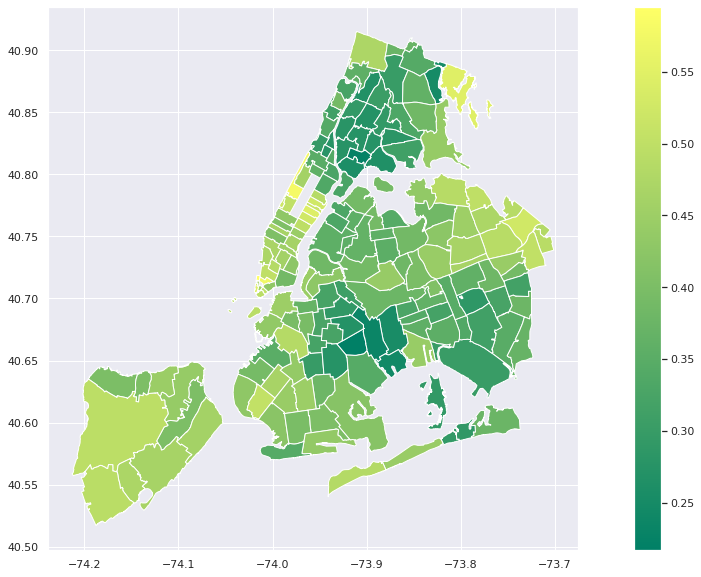

In [11]:
#wbi_data['well_being_index'] = pop_label['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
pop_zip.plot(column='well_being_index',cmap='summer', 
                                    legend=True,ax=ax)


**Twitter Dataset Rankings**

In [78]:
#importing dataset
t_data = pd.read_csv('/content/drive/MyDrive/df_combined.csv')

In [79]:
t_data

,Unnamed: 0,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
0,0,10001,0.51,0.36,0.13,0.32,0.42,0.472468,0.521412,0.627726,0.381152,0.609691,0.009157
1,1,10002,0.35,0.41,0.26,0.39,0.24,0.416539,0.189844,0.561431,0.998278,0.001722,0.000000
2,2,10003,0.52,0.38,0.13,0.28,0.44,0.676661,0.605687,0.624064,0.868908,0.131092,0.000000
3,3,10004,0.48,0.43,0.09,0.40,0.48,0.681547,0.880601,0.661027,0.716858,0.001637,0.281506
4,4,10005,0.53,0.39,0.08,0.33,0.52,0.804327,0.847911,0.693762,0.769063,0.230937,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,11691,0.29,0.21,0.50,0.40,0.17,0.303052,0.250994,0.822393,0.026514,0.001116,0.972370
176,176,11692,0.16,0.20,0.64,0.38,0.17,0.255352,0.242189,0.529640,0.956311,0.038835,0.004854
177,177,11693,0.16,0.24,0.60,0.40,0.17,0.235193,0.340733,0.682084,0.621622,0.297297,0.081081
178,178,11694,0.24,0.31,0.45,0.48,0.25,0.393605,0.459603,0.630662,0.596296,0.025926,0.377778


In [81]:
t_data.sort_values(by = ['0_percent', '1_percent', '2_percent'], ascending = [False, False, True],  axis=0)

,Unnamed: 0,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent
27,27,10030,0.21,0.41,0.37,0.27,0.19,0.413183,0.205469,0.559922,1.000000,0.000000,0.000000
29,29,10032,0.24,0.32,0.43,0.31,0.20,0.369349,0.243174,0.673758,1.000000,0.000000,0.000000
34,34,10037,0.22,0.37,0.43,0.26,0.22,0.598611,0.215879,0.582185,1.000000,0.000000,0.000000
36,36,10039,0.19,0.38,0.43,0.27,0.21,0.280743,0.215029,0.450742,1.000000,0.000000,0.000000
43,43,10280,0.44,0.40,0.15,0.59,0.42,0.701548,0.994715,0.611580,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,11226,0.15,0.31,0.54,0.36,0.21,0.371679,0.297284,0.623436,0.017298,0.975212,0.007490
71,71,10466,0.26,0.26,0.50,0.39,0.16,0.250963,0.282344,0.590184,0.005411,0.984691,0.009898
38,38,10044,0.13,0.61,0.26,0.48,0.25,0.527655,0.534347,0.738966,0.000000,1.000000,0.000000
17,17,10020,0.53,0.34,0.12,0.44,0.35,0.585227,0.430398,0.705953,0.000000,0.612739,0.387261


In [82]:
t_data['green_tweet_rank'] = t_data['0_percent'].rank(method = 'first', pct=True)
t_data.sort_values(by = ['0_percent'], ascending = [False],  axis=0)

,Unnamed: 0,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent,green_tweet_rank
34,34,10037,0.22,0.37,0.43,0.26,0.22,0.598611,0.215879,0.582185,1.000000,0.000000,0.000000,0.966667
43,43,10280,0.44,0.40,0.15,0.59,0.42,0.701548,0.994715,0.611580,1.000000,0.000000,0.000000,0.977778
45,45,10282,0.42,0.42,0.18,0.61,0.39,1.000000,1.000000,0.606050,1.000000,0.000000,0.000000,0.988889
29,29,10032,0.24,0.32,0.43,0.31,0.20,0.369349,0.243174,0.673758,1.000000,0.000000,0.000000,0.961111
54,54,10312,0.29,0.22,0.49,0.60,0.22,0.302766,0.528007,0.172906,1.000000,0.000000,0.000000,0.994444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,11226,0.15,0.31,0.54,0.36,0.21,0.371679,0.297284,0.623436,0.017298,0.975212,0.007490,0.027778
71,71,10466,0.26,0.26,0.50,0.39,0.16,0.250963,0.282344,0.590184,0.005411,0.984691,0.009898,0.022222
38,38,10044,0.13,0.61,0.26,0.48,0.25,0.527655,0.534347,0.738966,0.000000,1.000000,0.000000,0.011111
17,17,10020,0.53,0.34,0.12,0.44,0.35,0.585227,0.430398,0.705953,0.000000,0.612739,0.387261,0.005556


In [83]:
t_data.sort_values(by = ['green_tweet_rank'], ascending = [False],  axis=0)

,Unnamed: 0,ZIPCODE,CTW_<25_Min,CTW_25-45_Min,CTW_>45_Min,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,final_score_scale,0_percent,1_percent,2_percent,green_tweet_rank
57,57,10452,0.21,0.28,0.53,0.35,0.12,0.161972,0.147294,0.560591,1.000000,0.000000,0.000000,1.000000
54,54,10312,0.29,0.22,0.49,0.60,0.22,0.302766,0.528007,0.172906,1.000000,0.000000,0.000000,0.994444
45,45,10282,0.42,0.42,0.18,0.61,0.39,1.000000,1.000000,0.606050,1.000000,0.000000,0.000000,0.988889
44,44,10281,0.67,0.30,0.04,0.50,0.40,0.000000,1.000000,0.658742,1.000000,0.000000,0.000000,0.983333
43,43,10280,0.44,0.40,0.15,0.59,0.42,0.701548,0.994715,0.611580,1.000000,0.000000,0.000000,0.977778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,11226,0.15,0.31,0.54,0.36,0.21,0.371679,0.297284,0.623436,0.017298,0.975212,0.007490,0.027778
71,71,10466,0.26,0.26,0.50,0.39,0.16,0.250963,0.282344,0.590184,0.005411,0.984691,0.009898,0.022222
179,179,11697,0.26,0.25,0.51,0.64,0.29,0.322790,0.563877,0.865109,0.000000,0.022222,0.977778,0.016667
38,38,10044,0.13,0.61,0.26,0.48,0.25,0.527655,0.534347,0.738966,0.000000,1.000000,0.000000,0.011111


In [86]:
final_tweetgreen_rank = t_data[["ZIPCODE","green_tweet_rank"]]

In [87]:
final_tweetgreen_rank.to_csv("green_ranks.csv")

In [88]:
files.download("green_ranks.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>